### Defining and Importing necessary libraries

In [ ]:
# Essential Libraries for Data Cleaning and Text Processing
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

### Load the dataset

In [ ]:
'''
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format
    | Arguments :
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Load Datasets
# Load tweet data
tweet_data = pd.read_csv('stock_tweets.csv')
tweet_data = pd.DataFrame(tweet_data)

# Load stock data
stock_data = pd.read_csv('stock_data.csv')
stock_data = pd.DataFrame(stock_data)

# Display the shape of the datasets
print("Tweet Data Shape:", tweet_data.shape)
print("Stock Data Shape:", stock_data.shape)

# Display the first few rows of each dataset for verification
print("\nFirst 5 rows of Tweet Data:")
display(tweet_data.head())

print("\nFirst 5 rows of Stock Data:")
display(stock_data.head())


Tweet Data Shape: (80793, 4)
Stock Data Shape: (6800, 13)

First 5 rows of Tweet Data:


,Date,Tweet,Ticker,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."



First 5 rows of Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Market Cap,P/E Ratio,Dividend Yield,EPS
0,2021-09-01 00:00:00-04:00,244.693329,247.330002,243.756668,244.696671,39612900,0.0,0.0,TSLA,1131861245952,173.34483,NaN,2.03
1,2021-09-02 00:00:00-04:00,244.833328,246.990005,243.513336,244.130005,38331900,0.0,0.0,TSLA,1131861245952,173.34483,NaN,2.03
2,2021-09-03 00:00:00-04:00,244.083328,244.666672,241.399994,244.523331,45738300,0.0,0.0,TSLA,1131861245952,173.34483,NaN,2.03
3,2021-09-07 00:00:00-04:00,246.666672,253.399994,246.419998,250.973328,60119400,0.0,0.0,TSLA,1131861245952,173.34483,NaN,2.03
4,2021-09-08 00:00:00-04:00,253.860001,254.816666,246.923340,251.289993,56379000,0.0,0.0,TSLA,1131861245952,173.34483,NaN,2.03


In [ ]:
# Convert 'Date' columns to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce').dt.date
tweet_data['Date'] = pd.to_datetime(tweet_data['Date'], errors='coerce').dt.date

# Confirm the conversion
print(stock_data['Date'].head())
print(tweet_data['Date'].head())

0    2021-09-01
1    2021-09-02
2    2021-09-03
3    2021-09-07
4    2021-09-08
Name: Date, dtype: object
0    2022-09-29
1    2022-09-29
2    2022-09-29
3    2022-09-29
4    2022-09-29
Name: Date, dtype: object


In [ ]:
def trim(df):
    """
    Cleans the DataFrame by performing the following operations:
    - Strips whitespace from column names
    - Drops duplicate rows
    - Converts column names to lowercase
    - Replaces spaces in column names with underscores
    - Converts object columns to string and strips whitespace
    """
    df.columns = df.columns.str.strip()  # Strip whitespace from column names
    df = df.drop_duplicates()  # Drop duplicate rows
    df.columns = df.columns.str.lower()  # Convert column names to lowercase
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores

    # Clean object type columns (categorical/text data)
    df_obj = df.select_dtypes(['object'])
    df[df_obj.columns] = df_obj.apply(lambda x: x.astype(str).str.strip())  # Convert to string and strip whitespace

    print("All column names cleaned, duplicates dropped, and text columns processed.")
    return df


In [ ]:


# Apply the cleaning function to both datasets
tweet_data_cleaned = trim(tweet_data)
stock_data_cleaned = trim(stock_data)


All column names cleaned, duplicates dropped, and text columns processed.
All column names cleaned, duplicates dropped, and text columns processed.


<ipython-input-52-7f14f1a290ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df_obj.columns] = df_obj.apply(lambda x: x.astype(str).str.strip())  # Convert to string and strip whitespace


In [ ]:
tweet_data_cleaned

,date,tweet,ticker,company_name
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [ ]:
stock_data_cleaned

,date,open,high,low,close,volume,dividends,stock_splits,ticker,market_cap,p/e_ratio,dividend_yield,eps
0,2021-09-01,244.693329,247.330002,243.756668,244.696671,39612900,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
1,2021-09-02,244.833328,246.990005,243.513336,244.130005,38331900,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
2,2021-09-03,244.083328,244.666672,241.399994,244.523331,45738300,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
3,2021-09-07,246.666672,253.399994,246.419998,250.973328,60119400,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
4,2021-09-08,253.860001,254.816666,246.923340,251.289993,56379000,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,2022-09-23,10.320598,10.412671,10.002526,10.303858,104043700,0.0,0.0,F,36602462208,6.325342,7.91,1.46
6796,2022-09-26,10.220153,10.362448,9.985785,10.036006,89300400,0.0,0.0,F,36602462208,6.325342,7.91,1.46
6797,2022-09-27,10.220152,10.228523,9.759785,9.969043,87044400,0.0,0.0,F,36602462208,6.325342,7.91,1.46
6798,2022-09-28,9.969046,10.245266,9.843491,10.195045,72701600,0.0,0.0,F,36602462208,6.325342,7.91,1.46


Tweet Text Cleaning Steps:
Convert text to lowercase.
Remove URLs.
Remove mentions (@usernames).
Remove hashtags (but keep the words).
Remove numbers and special characters.
Remove extra whitespaces.
Remove stopwords.
Lemmatization.

In [ ]:

'''
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments :
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()

    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters

    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)

    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text

In [ ]:
# Apply the Preprocessing on Input Data Comments of Training Data
tweet_data_cleaned['tweet'] = tweet_data_cleaned['tweet'].apply(data_preprocessing)

print("\n Data After Pre-processing:")
print("====================================\n")
tweet_data_cleaned


 Data After Pre-processing:



<ipython-input-57-e433bf84c64f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data_cleaned['tweet'] = tweet_data_cleaned['tweet'].apply(data_preprocessing)


,date,tweet,ticker,company_name
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc."
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc."
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc."
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc."
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.
80789,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.
80790,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.
80791,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.


In [ ]:
# Rename the 'Ticker' column to 'ticker' in tweet_data_cleaned
tweet_data_cleaned.rename(columns={'Ticker': 'ticker'}, inplace=True)

# Verify the renaming
print("Renamed columns in tweet_data_cleaned:")
print(tweet_data_cleaned.columns)


<ipython-input-58-c0478aa95fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data_cleaned.rename(columns={'Ticker': 'ticker'}, inplace=True)


Renamed columns in tweet_data_cleaned:
Index(['date', 'tweet', 'ticker', 'company_name'], dtype='object')


In [ ]:
stock_data_cleaned

,date,open,high,low,close,volume,dividends,stock_splits,ticker,market_cap,p/e_ratio,dividend_yield,eps
0,2021-09-01,244.693329,247.330002,243.756668,244.696671,39612900,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
1,2021-09-02,244.833328,246.990005,243.513336,244.130005,38331900,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
2,2021-09-03,244.083328,244.666672,241.399994,244.523331,45738300,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
3,2021-09-07,246.666672,253.399994,246.419998,250.973328,60119400,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
4,2021-09-08,253.860001,254.816666,246.923340,251.289993,56379000,0.0,0.0,TSLA,1131861245952,173.344830,NaN,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,2022-09-23,10.320598,10.412671,10.002526,10.303858,104043700,0.0,0.0,F,36602462208,6.325342,7.91,1.46
6796,2022-09-26,10.220153,10.362448,9.985785,10.036006,89300400,0.0,0.0,F,36602462208,6.325342,7.91,1.46
6797,2022-09-27,10.220152,10.228523,9.759785,9.969043,87044400,0.0,0.0,F,36602462208,6.325342,7.91,1.46
6798,2022-09-28,9.969046,10.245266,9.843491,10.195045,72701600,0.0,0.0,F,36602462208,6.325342,7.91,1.46


In [ ]:

# Merge both datasets on 'Date' and 'ticker'
merged_data = pd.merge(tweet_data_cleaned, stock_data_cleaned, on=['date','ticker'], how='inner')

# Display the shape and a preview of the merged dataset
print("Shape of the merged dataset:", merged_data.shape)
merged_data

Shape of the merged dataset: (39880, 15)


,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,market_cap,p/e_ratio,dividend_yield,eps
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,12748700,0.0,0.0,17051217920,NaN,NaN,-1.20
39876,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,6557200,0.0,0.0,17051217920,NaN,NaN,-1.20
39877,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,0.0,17051217920,NaN,NaN,-1.20
39878,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,0.0,17051217920,NaN,NaN,-1.20


In [ ]:
# Display the shape before removing duplicates
print("Shape before removing duplicates:", merged_data.shape)

# Remove duplicate rows
merged_data.drop_duplicates(inplace=True)

# Display the shape after removing duplicates
print("Shape after removing duplicates:", merged_data.shape)

Shape before removing duplicates: (39880, 15)
Shape after removing duplicates: (39721, 15)


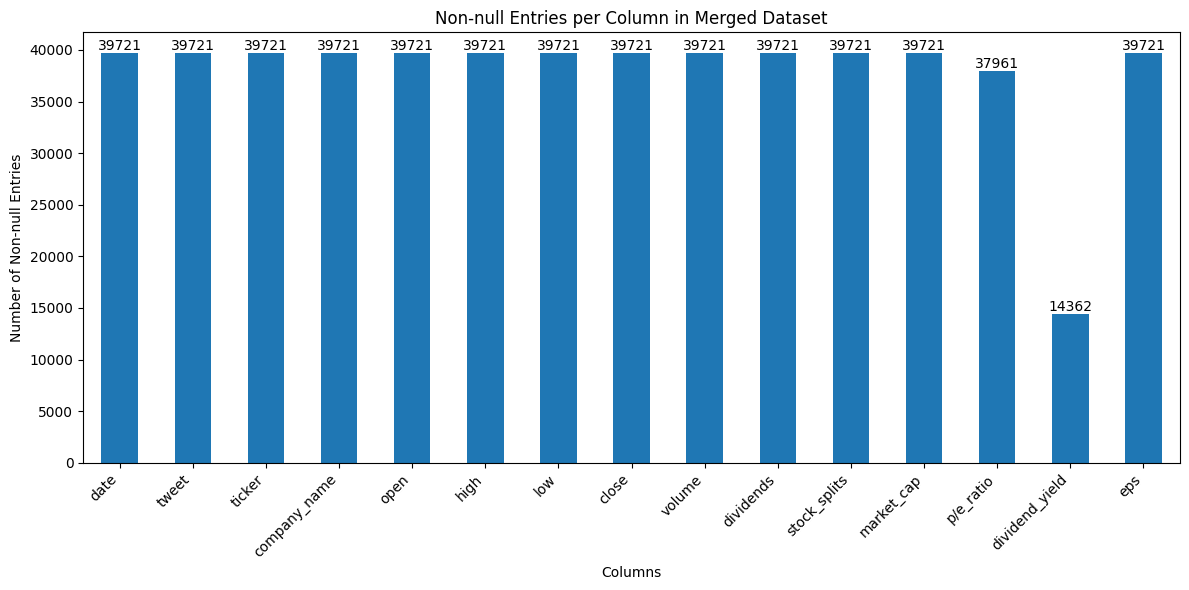

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of non-null entries for each column in the merged dataset
non_null_counts = merged_data.count()

# Set the size of the figure for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot of the non-null counts
ax = non_null_counts.plot(kind='bar')

# Set the title of the plot
plt.title('Non-null Entries per Column in Merged Dataset')

# Label the x-axis
plt.xlabel('Columns')

# Label the y-axis
plt.ylabel('Number of Non-null Entries')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to each bar in the plot
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.tight_layout()
plt.show()


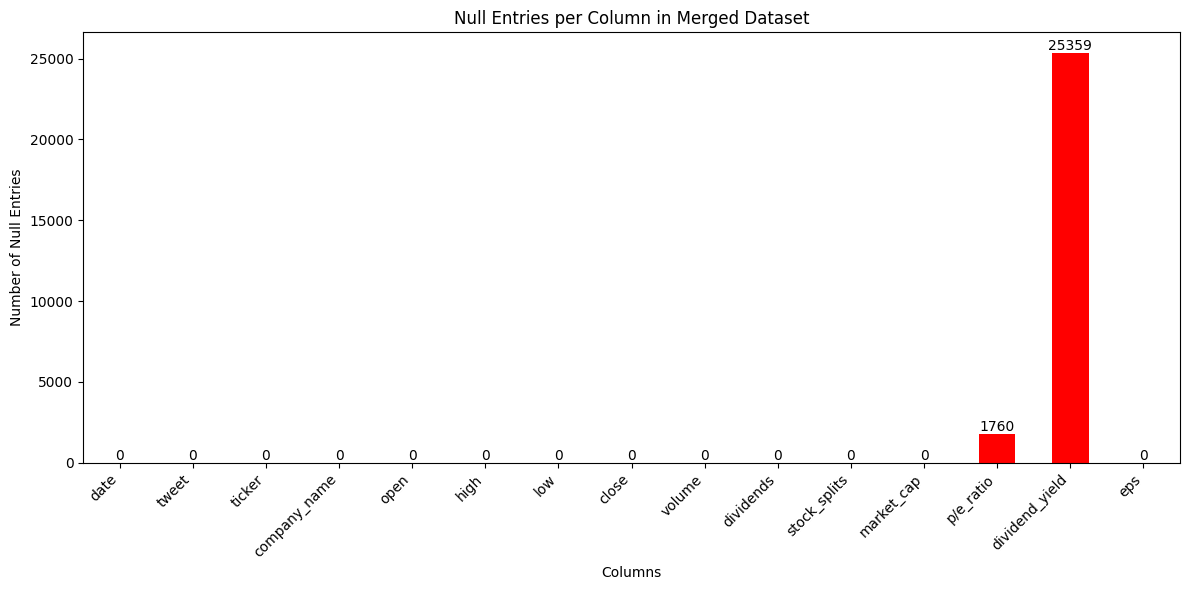

In [ ]:
# Calculate the number of null entries in each column of the merged dataset
null_counts = merged_data.isnull().sum()

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot of the null counts per column
ax = null_counts.plot(kind='bar', color='red')  # Using red to highlight missing values

# Set the title of the plot
plt.title('Null Entries per Column in Merged Dataset')

# Set the label for the x-axis
plt.xlabel('Columns')

# Set the label for the y-axis
plt.ylabel('Number of Null Entries')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to the bars in the plot
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Display the shape before removing duplicates
print("Shape before removing duplicates:", merged_data.shape)

# Remove duplicate rows
merged_data.drop_duplicates(inplace=True)

# Display the shape after removing duplicates
print("Shape after removing duplicates:", merged_data.shape)


Shape before removing duplicates: (39721, 15)
Shape after removing duplicates: (39721, 15)


###EDA

In [ ]:

df_1 = merged_data.copy()
df_1

,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,market_cap,p/e_ratio,dividend_yield,eps
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,12748700,0.0,0.0,17051217920,NaN,NaN,-1.20
39876,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,6557200,0.0,0.0,17051217920,NaN,NaN,-1.20
39877,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,0.0,17051217920,NaN,NaN,-1.20
39878,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,0.0,17051217920,NaN,NaN,-1.20


In [ ]:
value_count = df_1['ticker'].value_counts()
value_count

,count
ticker,
TSLA,19166
TSM,4709
AAPL,2714
PG,2027
AMZN,2027
MSFT,2027
NIO,1279
META,1178
AMD,1104


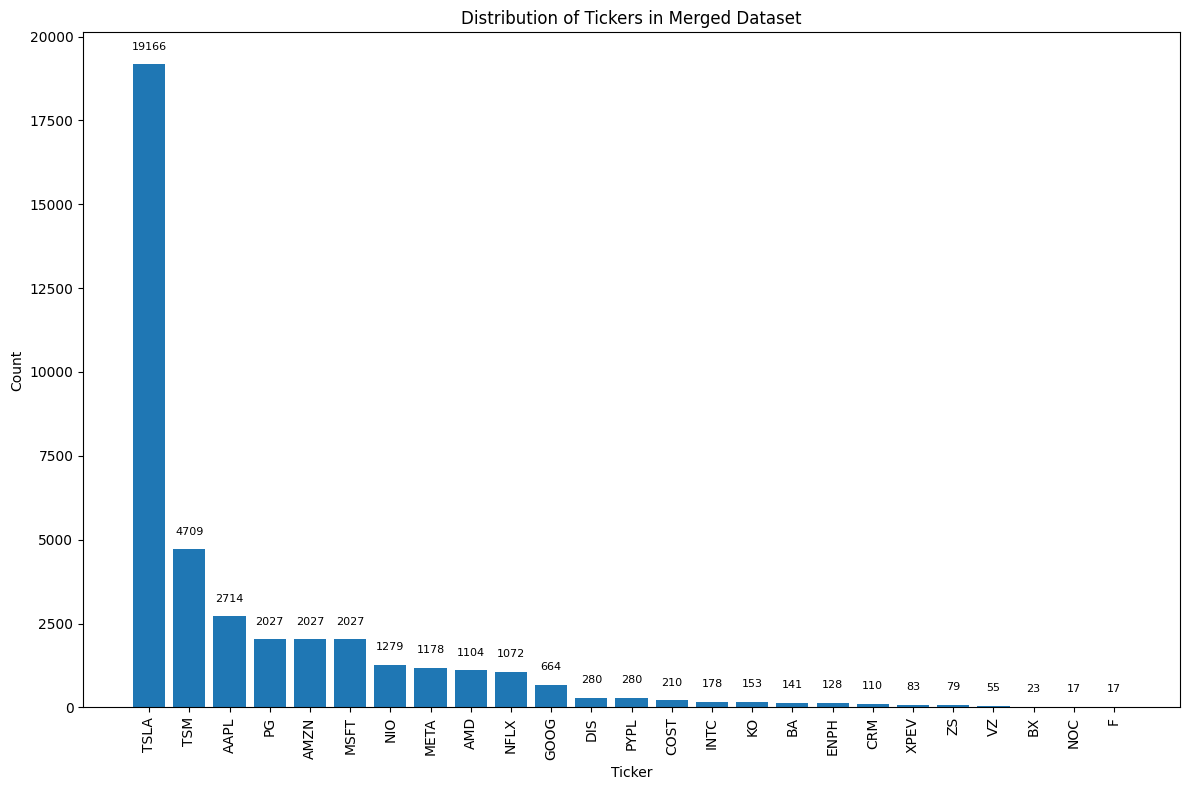

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot with the index (tickers) on the x-axis and the counts on the y-axis
plt.bar(value_count.index, value_count)

# Add a title to the plot
plt.title('Distribution of Tickers in Merged Dataset')

# Label the x-axis
plt.xlabel('Ticker')

# Label the y-axis
plt.ylabel('Count')

# Add the count labels on top of each bar
for i, count in enumerate(value_count):
    # Position the text slightly above the bar
    plt.text(i, count + 0.02 * max(value_count), str(count), ha='center', va='bottom', fontsize=8)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Adjust the plot to ensure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()


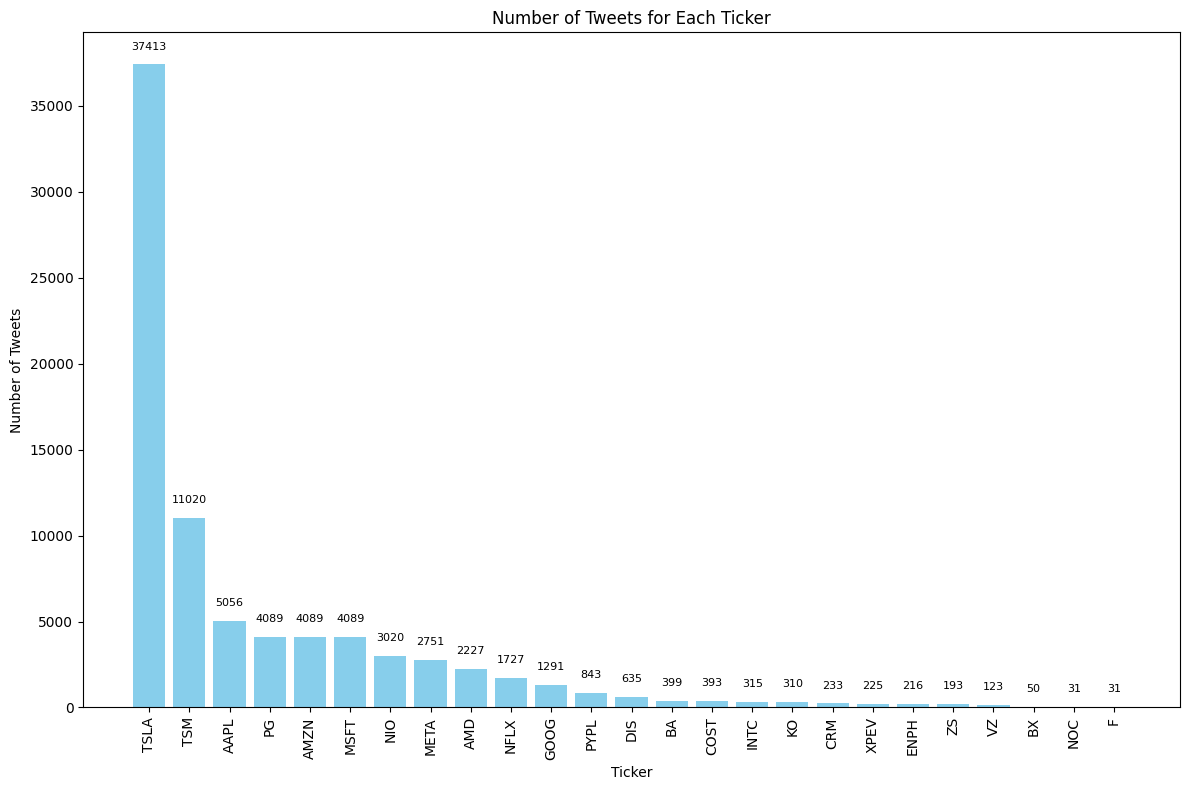

,count
ticker,
TSLA,37413
TSM,11020
AAPL,5056
PG,4089
AMZN,4089
MSFT,4089
NIO,3020
META,2751
AMD,2227


In [ ]:
# Count the number of tweets for each ticker
tweet_counts = tweet_data_cleaned['ticker'].value_counts()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot of the tweet counts per ticker
plt.bar(tweet_counts.index, tweet_counts, color='skyblue')

# Add a title to the plot
plt.title('Number of Tweets for Each Ticker')

# Label the x-axis
plt.xlabel('Ticker')

# Label the y-axis
plt.ylabel('Number of Tweets')

# Add count labels on top of each bar
for i, count in enumerate(tweet_counts):
    plt.text(i, count + 0.02 * max(tweet_counts), str(count), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Display the tweet counts directly for reference
tweet_counts


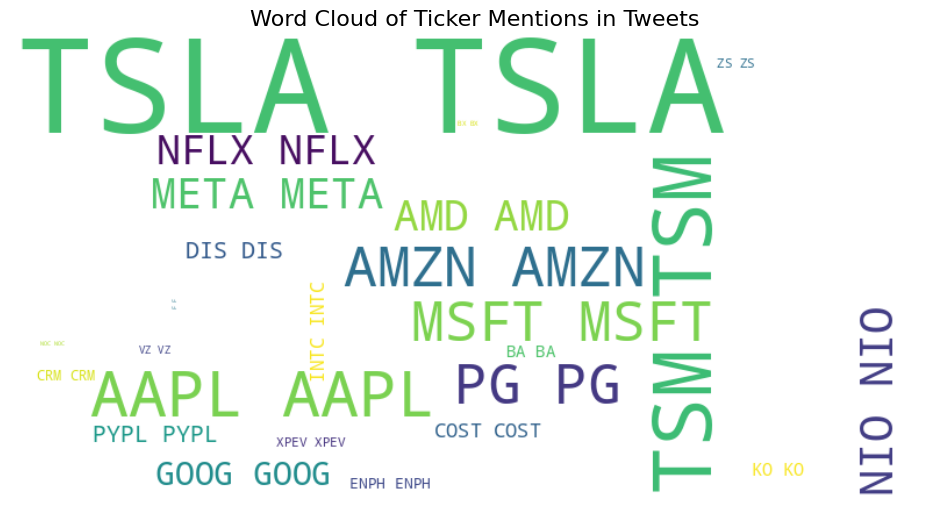

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the 'ticker' column to string type to avoid any issues
df_1['ticker'] = df_1['ticker'].astype(str)

# Concatenate all ticker values into a single string, separated by spaces
text = ' '.join(df_1['ticker'])

# Generate a word cloud from the concatenated ticker text
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Set up the plot with a specific figure size
plt.figure(figsize=(12, 8))

# Display the word cloud image using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axis labels
plt.axis('off')

# Show the plot
plt.title("Word Cloud of Ticker Mentions in Tweets", fontsize=16)
plt.show()


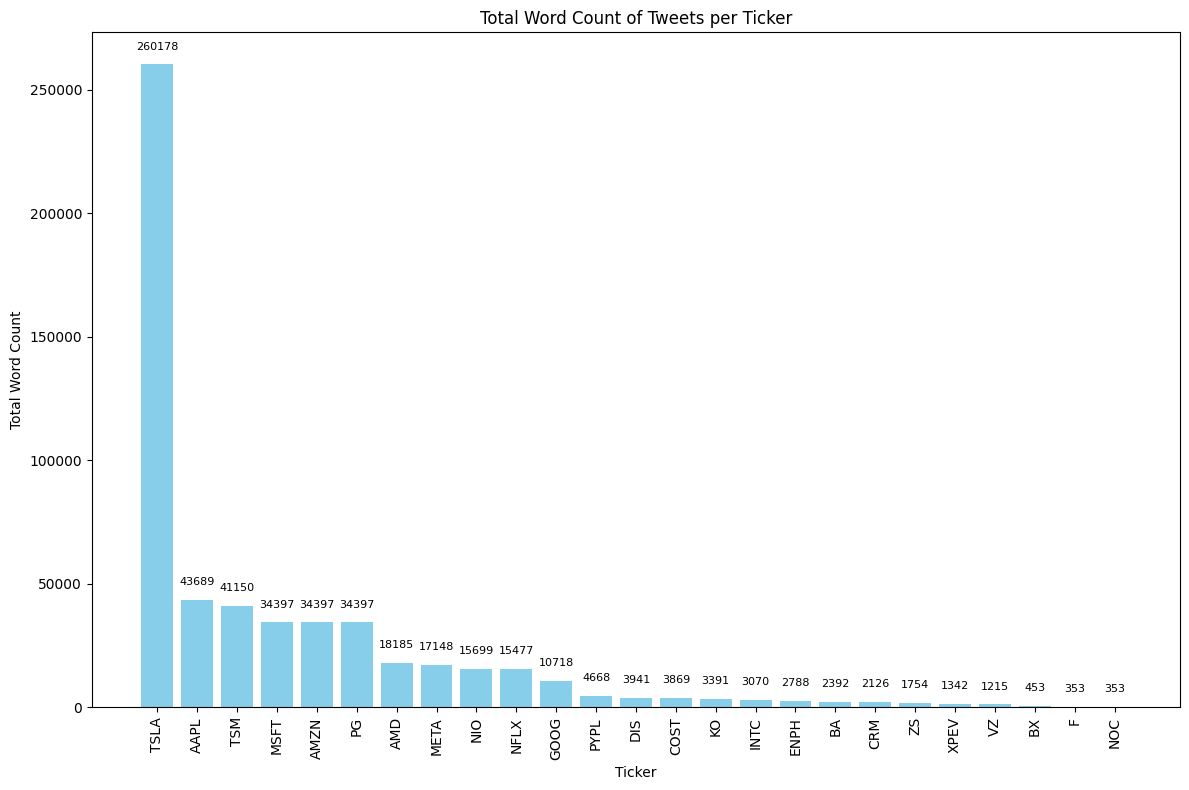

,word_count
ticker,
TSLA,260178
AAPL,43689
TSM,41150
MSFT,34397
AMZN,34397
PG,34397
AMD,18185
META,17148
NIO,15699


In [ ]:
# Ensure the 'ticker' and 'tweet' columns are in string format
df_1['ticker'] = df_1['ticker'].astype(str)
df_1['tweet'] = df_1['tweet'].astype(str)

# Create a new column for word count of each tweet
df_1['word_count'] = df_1['tweet'].apply(lambda x: len(x.split()))

# Group by 'ticker' and sum the word counts to get total word count per ticker
total_word_count_per_ticker = df_1.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for total word count per ticker
plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')

# Add a title to the plot
plt.title('Total Word Count of Tweets per Ticker')

# Label the x-axis
plt.xlabel('Ticker')

# Label the y-axis
plt.ylabel('Total Word Count')

# Add count labels on top of each bar
for i, count in enumerate(total_word_count_per_ticker):
    plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Display the total word counts directly for reference
total_word_count_per_ticker


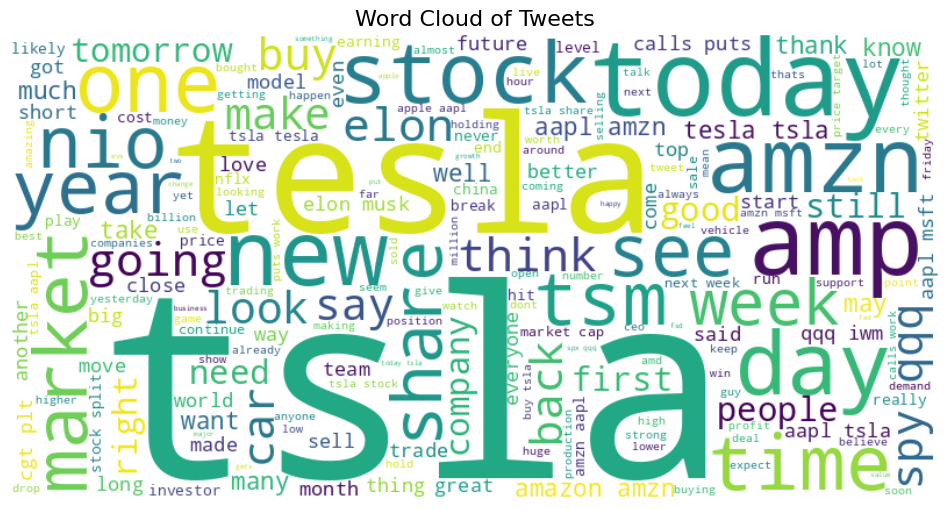

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the 'tweet' column is in string format
df_1['tweet'] = df_1['tweet'].astype(str)

# Concatenate all tweet texts into a single string
all_tweets_text = ' '.join(df_1['tweet'])

# Generate a word cloud from the combined tweet text
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_tweets_text)

# Set up the plot with a specific figure size
plt.figure(figsize=(12, 8))

# Display the word cloud image using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axis labels
plt.axis('off')

# Add a title
plt.title("Word Cloud of Tweets", fontsize=16)

# Show the plot
plt.show()


In [ ]:
df_1

,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,market_cap,p/e_ratio,dividend_yield,eps,word_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,27
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,6
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,22
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,23
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,12748700,0.0,0.0,17051217920,NaN,NaN,-1.20,9
39876,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,6557200,0.0,0.0,17051217920,NaN,NaN,-1.20,23
39877,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,0.0,17051217920,NaN,NaN,-1.20,15
39878,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,0.0,17051217920,NaN,NaN,-1.20,19


In [ ]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the 'punkt_tab' resource

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')

# Function to tokenize cleaned tweet text
def tokenize_tweet(text):
    """
    Tokenizes cleaned tweet text into individual words.
    """
    if pd.isnull(text):
        return []
    return word_tokenize(text)

# Apply tokenization to the cleaned tweet data
def apply_tokenization(df):
    """
    Applies tokenization to the 'cleaned_tweet' column and adds a new 'tokens' column.
    """
    tqdm.pandas()  # Progress bar for large datasets
    df['tokens'] = df['tweet'].progress_apply(tokenize_tweet)
    print("Tokenization completed.")
    return df

# Apply tokenization to the cleaned tweet dataset
df_1_tokenized = apply_tokenization(df_1)

# Display the first few rows to verify tokenization
df_1_tokenized.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 39721/39721 [00:05<00:00, 6792.38it/s]


Tokenization completed.


,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,market_cap,p/e_ratio,dividend_yield,eps,word_count,tokens
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,27,"[mainstream, media, done, amazing, job, brainw..."
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,6,"[tesla, delivery, estimates, around, analysts,..."
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,22,"[even, include, unvested, rsus, additional, eq..."
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,23,"[hahaha, still, trying, stop, tesla, fsd, bro,..."
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,8,"[stop, trying, kill, kids, sad, deranged, old,..."


In [ ]:
import nltk
from nltk.corpus import stopwords


# Load the English stopwords list
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokens
def remove_stopwords(tokens):
    """
    Removes stopwords from a list of tokens.
    """
    if not isinstance(tokens, list):
        return []
    return [word for word in tokens if word.lower() not in stop_words]

# Apply stopwords removal to the tokenized data
def apply_stopwords_removal(df):
    """
    Removes stopwords from the 'tokens' column and stores the result in a new 'filtered_tokens' column.
    """
    tqdm.pandas()  # Enable progress bar
    df['filtered_tokens'] = df['tokens'].progress_apply(remove_stopwords)
    print("Stop words removal completed.")
    return df

# Apply the stop words removal function
df_1_no_stopwords = apply_stopwords_removal(df_1_tokenized)

# Display the first few rows to verify stopwords removal
df_1_no_stopwords.head()


100%|██████████| 39721/39721 [00:00<00:00, 252105.57it/s]


Stop words removal completed.


,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,market_cap,p/e_ratio,dividend_yield,eps,word_count,tokens,filtered_tokens
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw..."
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,..."
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq..."
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,..."
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,..."


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')  # For better lemmatization

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    """
    Lemmatizes a list of tokens.
    """
    if not isinstance(tokens, list):
        return []
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the filtered tokens
def apply_lemmatization(df):
    """
    Applies lemmatization to the 'filtered_tokens' column and stores results in 'lemmatized_tokens'.
    """
    tqdm.pandas()  # Enable progress bar
    df['lemmatized_tokens'] = df['filtered_tokens'].progress_apply(lemmatize_tokens)
    print("Lemmatization completed.")
    return df

# Apply the lemmatization function
df_1_lemmatized = apply_lemmatization(df_1_no_stopwords)

# Display the first few rows to verify lemmatization
df_1_lemmatized.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|██████████| 39721/39721 [00:07<00:00, 5425.93it/s] 


Lemmatization completed.


,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,stock_splits,market_cap,p/e_ratio,dividend_yield,eps,word_count,tokens,filtered_tokens,lemmatized_tokens
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain..."
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t..."
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq..."
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,..."
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.76001,283.649994,265.779999,268.209991,77620600,0.0,0.0,1131861245952,173.34483,NaN,2.03,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ..."


In [ ]:
# Expanded list of financial-related keywords
financial_keywords = [
    # Basic Finance Terms
    'profit', 'loss', 'revenue', 'growth', 'investment', 'dividend', 'portfolio', 'capital',
    'liquidity', 'merger', 'acquisition', 'stock', 'market', 'share', 'earnings', 'valuation',
    'bond', 'fund', 'equity', 'broker', 'index', 'exchange', 'asset', 'liability', 'return',

    # Trading and Market Terms
    'bullish', 'bearish', 'rally', 'slump', 'crash', 'surge', 'plummet', 'breakout', 'resistance', 'support',
    'short', 'long', 'buy', 'sell', 'hold', 'volume', 'volatility', 'momentum', 'divergence', 'correction',
    'trend', 'consolidation', 'liquidation', 'margin', 'leverage', 'stoploss', 'takeprofit', 'hedge',

    # Financial Ratios & Metrics
    'pe', 'p/e', 'eps', 'ebitda', 'debt', 'roi', 'roe', 'roa', 'cashflow', 'dividend_yield', 'valuation',
    'net_income', 'gross_margin', 'operating_margin', 'price_target', 'beta', 'book_value', 'market_cap',

    # Economic Indicators
    'inflation', 'deflation', 'interest_rate', 'gdp', 'unemployment', 'consumer_confidence', 'cpi', 'ppi',
    'recession', 'stimulus', 'quantitative_easing', 'federal_reserve', 'central_bank', 'treasury', 'bond_yield',

    # Company Actions
    'buyback', 'split', 'ipo', 'spinoff', 'dividend_increase', 'dividend_cut', 'earnings_report', 'forecast',

    # Sentiment & News Indicators
    'upgrade', 'downgrade', 'forecast', 'outlook', 'guidance', 'beat', 'miss', 'surpass', 'disappoint',

    # Cryptocurrencies & Modern Finance
    'crypto', 'bitcoin', 'ethereum', 'blockchain', 'nft', 'token', 'defi', 'exchange_traded_fund', 'etf'
]

# Function to count financial keywords in lemmatized tokens
def count_financial_keywords(tokens):
    """
    Counts the number of financial-related keywords in tokenized tweets.
    """
    if not isinstance(tokens, list):
        return 0
    return sum(1 for word in tokens if word in financial_keywords)

# Apply the count function to the lemmatized tokens
def apply_financial_keywords_extraction(df):
    """
    Adds a new column for the count of financial keywords found in each tweet.
    """
    tqdm.pandas()  # Enable progress bar
    df['financial_keyword_count'] = df['lemmatized_tokens'].progress_apply(count_financial_keywords)
    print("Financial keyword extraction completed.")
    return df

# Apply financial keyword extraction to the dataset
df_1_financial = apply_financial_keywords_extraction(df_1_lemmatized)

# Preview the DataFrame to verify
df_1_financial[['ticker', 'tweet', 'financial_keyword_count']]


100%|██████████| 39721/39721 [00:00<00:00, 41110.23it/s]


Financial keyword extraction completed.


,ticker,tweet,financial_keyword_count
0,TSLA,mainstream media done amazing job brainwashing...,0
1,TSLA,tesla delivery estimates around analysts tsla,0
2,TSLA,even include unvested rsus additional equity n...,3
3,TSLA,hahaha still trying stop tesla fsd bro get shi...,0
4,TSLA,stop trying kill kids sad deranged old man,0
...,...,...,...
39875,XPEV,fastest growing tech stocks market mix upst xp...,2
39876,XPEV,earnings horizon quick snapshot largest increa...,3
39877,XPEV,record delivery results testimony unwavering p...,0
39878,XPEV,delivered smart evs sep reaching milestone uni...,0


In [ ]:
# Count the number of mentions for each ticker
ticker_mentions = df_1_financial['ticker'].value_counts().to_dict()

# Map the count of ticker mentions back to the DataFrame
df_1_financial['ticker_mention_count'] = df_1_financial['ticker'].map(ticker_mentions)

# Display unique ticker mention counts
unique_ticker_mentions = df_1_financial[['ticker', 'ticker_mention_count']].drop_duplicates()
unique_ticker_mentions.head()



,ticker,ticker_mention_count
0,TSLA,19166
19248,MSFT,2027
21278,PG,2027
23308,META,1178
24488,AMZN,2027


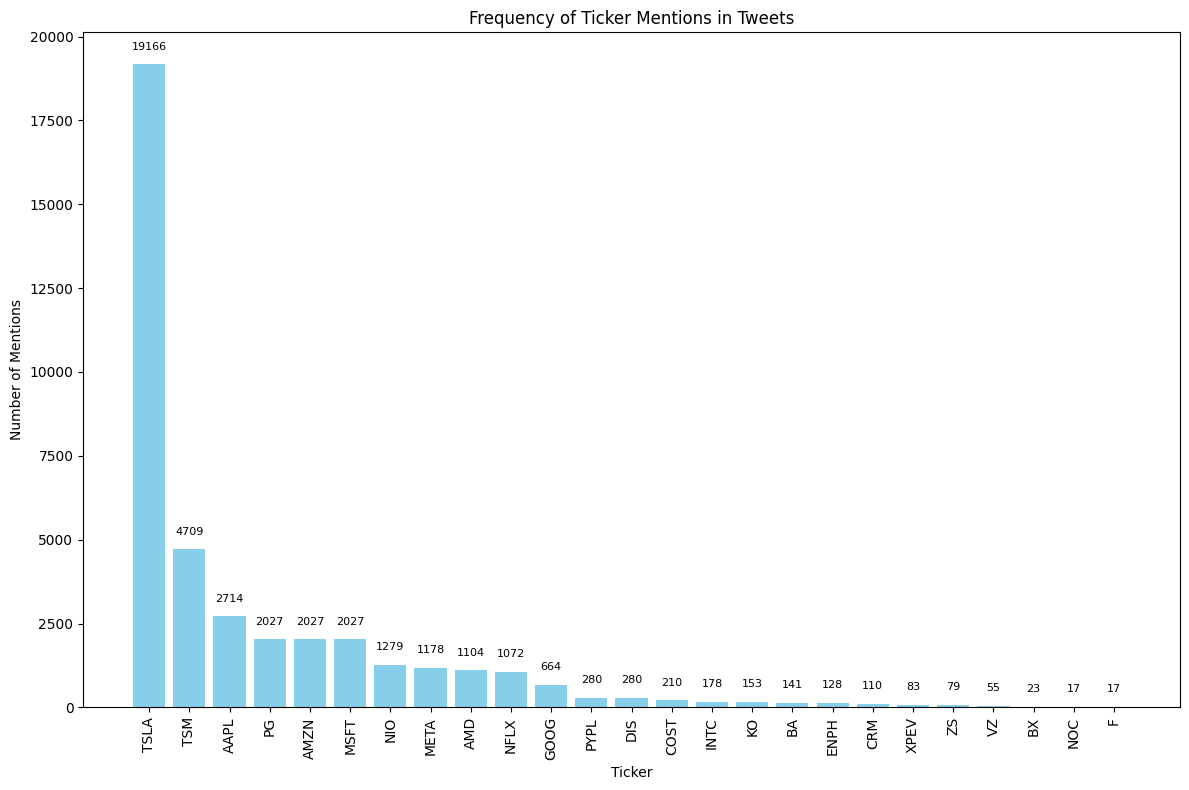

In [ ]:
import matplotlib.pyplot as plt

# Convert the ticker mentions dictionary to a DataFrame for visualization
ticker_mentions_df = pd.DataFrame(list(ticker_mentions.items()), columns=['ticker', 'mention_count']).sort_values(by='mention_count', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 8))
plt.bar(ticker_mentions_df['ticker'], ticker_mentions_df['mention_count'], color='skyblue')

# Add titles and labels
plt.title('Frequency of Ticker Mentions in Tweets')
plt.xlabel('Ticker')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)

# Add labels on top of bars
for i, count in enumerate(ticker_mentions_df['mention_count']):
    plt.text(i, count + 0.02 * max(ticker_mentions_df['mention_count']), str(count), ha='center', va='bottom', fontsize=8)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_1_financial

,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,...,p/e_ratio,dividend_yield,eps,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count,volatility_keyword_count
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,173.34483,NaN,2.03,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,19166,0
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,173.34483,NaN,2.03,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,19166,0
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,173.34483,NaN,2.03,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,19166,0
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,173.34483,NaN,2.03,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,19166,0
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,173.34483,NaN,2.03,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,19166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,12748700,0.0,...,NaN,NaN,-1.20,9,"[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stock, market, mix, u...",2,83,0
39876,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,6557200,0.0,...,NaN,NaN,-1.20,23,"[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...",3,83,0
39877,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,...,NaN,NaN,-1.20,15,"[record, delivery, results, testimony, unwaver...","[record, delivery, results, testimony, unwaver...","[record, delivery, result, testimony, unwaveri...",0,83,0
39878,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,...,NaN,NaN,-1.20,19,"[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, ev, sep, reaching, mileston...",0,83,0


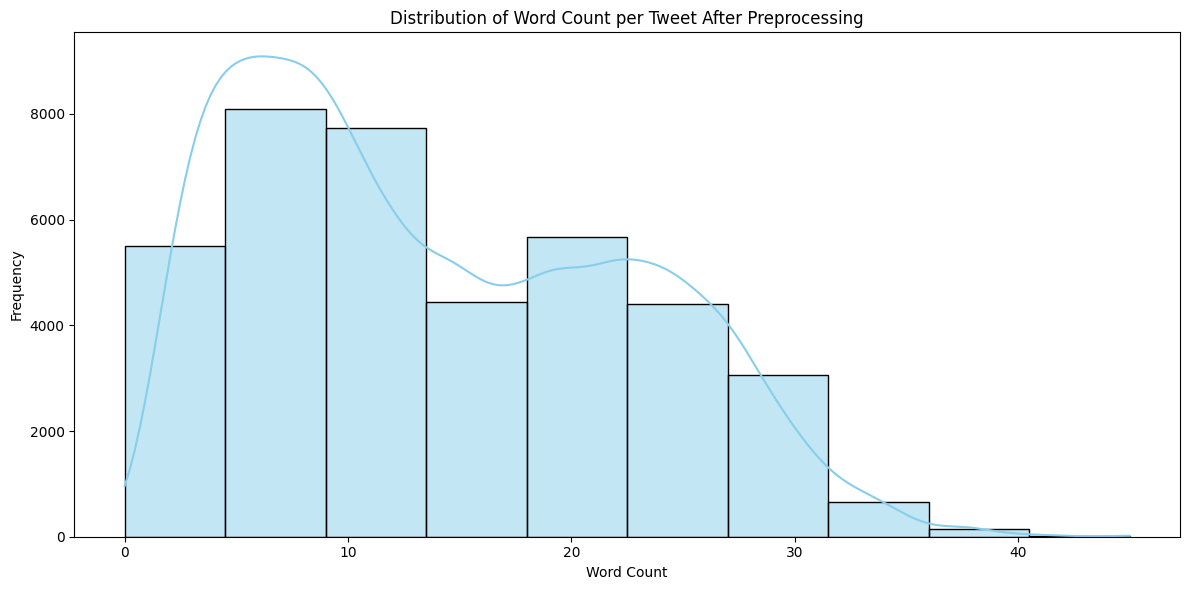

,word_count
ticker,
ZS,22.202532
KO,22.163399
VZ,22.090909
ENPH,21.781250
F,20.764706
NOC,20.764706
BX,19.695652
CRM,19.327273
COST,18.423810


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_time_filtered contains the preprocessed dataset

# Function to count words in the cleaned tweet
def count_words(text):
    """
    Counts the number of words in a cleaned tweet.
    """
    if not isinstance(text, str):
        return 0
    return len(text.split())

# Apply the word count function to the DataFrame
df_1_financial['word_count'] = df_1_financial['tweet'].apply(count_words)

# Display the distribution of word counts across the dataset
plt.figure(figsize=(12, 6))
sns.histplot(df_1_financial['word_count'], bins=10, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Word Count per Tweet After Preprocessing')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

# Calculate and display the average word count per ticker for further analysis
average_word_count = df_1_financial.groupby('ticker')['word_count'].mean().sort_values(ascending=False)
average_word_count


Total word count before preprocessing: 557150
Total word count after preprocessing: 557150
Word count reduced by: 0.0% after preprocessing.


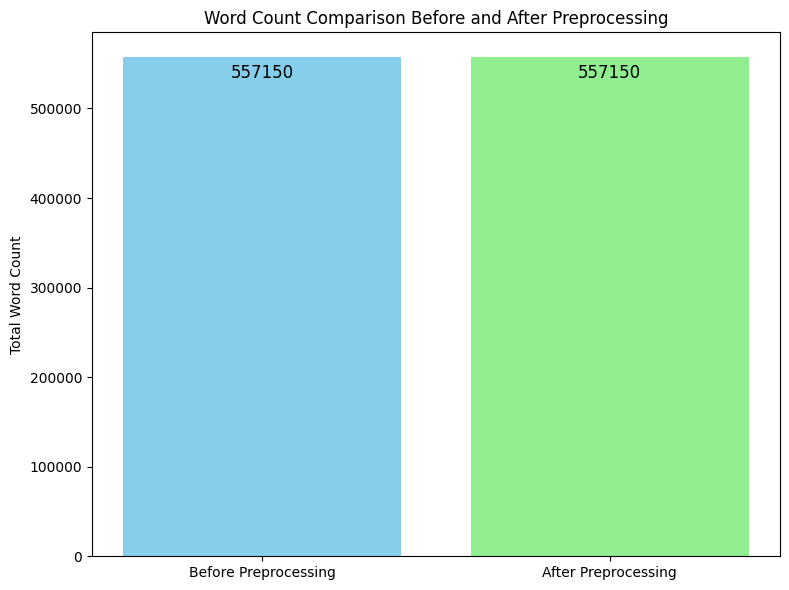

In [ ]:
# Assuming df_time_filtered contains both preprocessed and original tweet data
# 'tweet' column -> Original tweets before preprocessing
# 'cleaned_tweet' column -> Tweets after preprocessing

# Calculate total word count before preprocessing
total_word_count = df_1_financial['tweet'].str.split().str.len().sum()

# Calculate total word count after preprocessing
total_word_count_preprocessing = df_1_financial['tweet'].str.split().str.len().sum()

# Print the total word counts
print(f'Total word count before preprocessing: {int(total_word_count)}')
print(f'Total word count after preprocessing: {int(total_word_count_preprocessing)}')

# Calculate percentage reduction in word count after preprocessing
percentage_reduction = round((total_word_count - total_word_count_preprocessing) / total_word_count * 100, 2)

# Print the percentage reduction
print(f'Word count reduced by: {percentage_reduction}% after preprocessing.')

# Word counts before and after preprocessing
word_counts = [total_word_count, total_word_count_preprocessing]
labels = ['Before Preprocessing', 'After Preprocessing']

# Plotting the word count comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, word_counts, color=['skyblue', 'lightgreen'])
plt.title('Word Count Comparison Before and After Preprocessing')
plt.ylabel('Total Word Count')

# Adding the word count on top of each bar
for bar, count in zip(bars, word_counts):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() - (0.05 * max(word_counts)),  # Adjusting text height dynamically
             f'{count}',
             ha='center',
             va='bottom',
             fontsize=12,
             color='black')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Install transformers library (if not already installed)
!pip install transformers


In [ ]:
# Import necessary libraries
from transformers import pipeline
from tqdm import tqdm

# Initialize the BERT sentiment analysis pipeline
bert_sentiment_pipeline = pipeline("sentiment-analysis")

# Function to apply BERT sentiment analysis on tweets
def apply_bert_sentiment(df):
    """
    Applies BERT sentiment analysis to the tweet text and adds a 'sentiment' column.
    """
    tqdm.pandas()  # Enable progress bar for large datasets
    df['sentiment'] = df['tweet'].progress_apply(lambda x: bert_sentiment_pipeline(x)[0]['label'])
    print("BERT sentiment analysis completed.")
    return df

# Apply BERT sentiment analysis to the dataset
df_1_financial = apply_bert_sentiment(df_1_financial)

# Verify sentiment predictions
df_1_financial[['ticker', 'tweet', 'sentiment']].head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
100%|██████████| 39721/39721 [48:53<00:00, 13.54it/s]


BERT sentiment analysis completed.


,ticker,tweet,sentiment
0,TSLA,mainstream media done amazing job brainwashing...,NEGATIVE
1,TSLA,tesla delivery estimates around analysts tsla,NEGATIVE
2,TSLA,even include unvested rsus additional equity n...,NEGATIVE
3,TSLA,hahaha still trying stop tesla fsd bro get shi...,NEGATIVE
4,TSLA,stop trying kill kids sad deranged old man,NEGATIVE


In [ ]:
df_1_financial

,date,tweet,ticker,company_name,open,high,low,close,volume,dividends,...,eps,word_count,tokens,filtered_tokens,lemmatized_tokens,financial_keyword_count,ticker_mention_count,volatility_keyword_count,ticker_encoded,sentiment
0,2022-09-29,mainstream media done amazing job brainwashing...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,2.03,27,"[mainstream, media, done, amazing, job, brainw...","[mainstream, media, done, amazing, job, brainw...","[mainstream, medium, done, amazing, job, brain...",0,19166,0,20,NEGATIVE
1,2022-09-29,tesla delivery estimates around analysts tsla,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,2.03,6,"[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimates, around, analysts,...","[tesla, delivery, estimate, around, analyst, t...",0,19166,0,20,NEGATIVE
2,2022-09-29,even include unvested rsus additional equity n...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,2.03,22,"[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...","[even, include, unvested, rsus, additional, eq...",3,19166,0,20,NEGATIVE
3,2022-09-29,hahaha still trying stop tesla fsd bro get shi...,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,2.03,23,"[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...","[hahaha, still, trying, stop, tesla, fsd, bro,...",0,19166,0,20,NEGATIVE
4,2022-09-29,stop trying kill kids sad deranged old man,TSLA,"Tesla, Inc.",282.760010,283.649994,265.779999,268.209991,77620600,0.0,...,2.03,8,"[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kids, sad, deranged, old,...","[stop, trying, kill, kid, sad, deranged, old, ...",0,19166,0,20,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,2021-10-07,fastest growing tech stocks market mix upst xp...,XPEV,XPeng Inc.,36.900002,38.880001,36.840000,38.259998,12748700,0.0,...,-1.20,9,"[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stocks, market, mix, ...","[fastest, growing, tech, stock, market, mix, u...",2,83,0,23,POSITIVE
39876,2021-10-04,earnings horizon quick snapshot largest increa...,XPEV,XPeng Inc.,35.180000,35.200001,33.520000,34.110001,6557200,0.0,...,-1.20,23,"[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...","[earnings, horizon, quick, snapshot, largest, ...",3,83,0,23,NEGATIVE
39877,2021-10-01,record delivery results testimony unwavering p...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,...,-1.20,15,"[record, delivery, results, testimony, unwaver...","[record, delivery, results, testimony, unwaver...","[record, delivery, result, testimony, unwaveri...",0,83,0,23,POSITIVE
39878,2021-10-01,delivered smart evs sep reaching milestone uni...,XPEV,XPeng Inc.,36.750000,36.759998,35.080002,35.459999,7770600,0.0,...,-1.20,19,"[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, evs, sep, reaching, milesto...","[delivered, smart, ev, sep, reaching, mileston...",0,83,0,23,POSITIVE


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode ticker and sentiment columns
df_1_financial['sentiment_encoded'] = label_encoder.fit_transform(df_1_financial['sentiment'])

# Preview the encoded sentiment values
df_1_financial[['sentiment', 'sentiment_encoded']].drop_duplicates()


,sentiment,sentiment_encoded
0,NEGATIVE,0
5,POSITIVE,1


In [ ]:
# Flatten the tokenized tweets into a single string
def flatten_tokens(tokens):
    """
    Converts a list of tokens into a single space-separated string.
    """
    if isinstance(tokens, list):
        return ' '.join(tokens)
    return ''

# Apply flattening
df_1_financial['flattened_tweet'] = df_1_financial['lemmatized_tokens'].apply(flatten_tokens)

# Verify the updated DataFrame
df_1_financial[['ticker', 'flattened_tweet']].head()


,ticker,flattened_tweet
0,TSLA,mainstream medium done amazing job brainwashin...
1,TSLA,tesla delivery estimate around analyst tsla
2,TSLA,even include unvested rsus additional equity n...
3,TSLA,hahaha still trying stop tesla fsd bro get shi...
4,TSLA,stop trying kill kid sad deranged old man


In [ ]:
# Install necessary libraries if not installed
# !pip install scikit-learn

# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Initialize CountVectorizer for Bag of Words representation
vectorizer = CountVectorizer(max_features=1000)  # Limiting features for efficiency

# Convert the flattened tweets into BoW representation
X_bow = vectorizer.fit_transform(df_1_financial['flattened_tweet']).toarray()

# Check the shape of the BoW matrix
print("Shape of Bag of Words Representation:", X_bow.shape)


Shape of Bag of Words Representation: (39721, 1000)


In [ ]:
# Initialize PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95)

# Apply PCA on the BoW representation
X_pca = pca.fit_transform(X_bow)

# Check the new shape after applying PCA
print("Shape after applying PCA:", X_pca.shape)


Shape after applying PCA: (39721, 758)


In [ ]:
# Define the target variable (sentiment_encoded)
y = df_1_financial['sentiment_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Check the size of the split datasets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (31776, 758)
Testing Set Shape: (7945, 758)


In [ ]:
# Initialize Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Model Accuracy: 79.60%


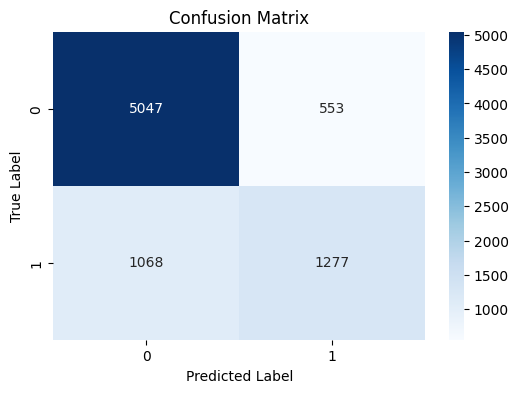

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.90      0.86      5600
    POSITIVE       0.70      0.54      0.61      2345

    accuracy                           0.80      7945
   macro avg       0.76      0.72      0.74      7945
weighted avg       0.79      0.80      0.79      7945



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred, target_names=df_1_financial['sentiment'].unique())
print("Classification Report:\n", report)


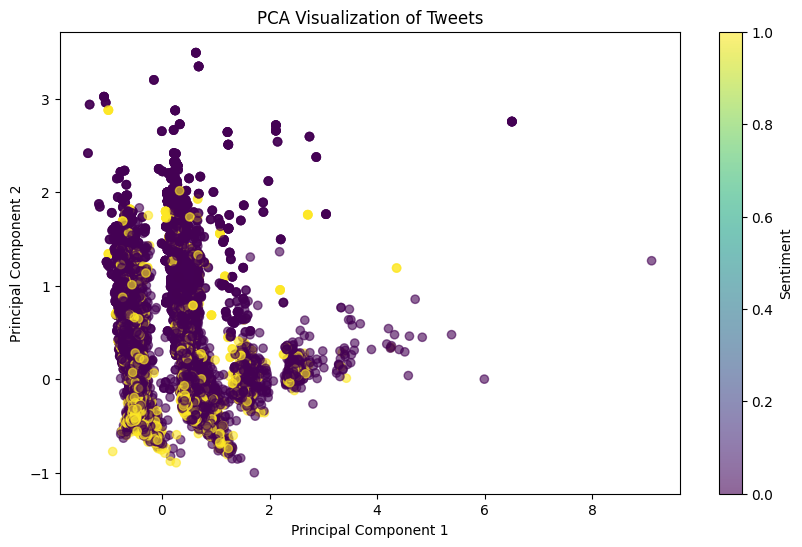

In [ ]:
# Visualizing the PCA components in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_1_financial['sentiment_encoded'], cmap='viridis', alpha=0.6)
plt.title('PCA Visualization of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Sentiment')
plt.show()


In [ ]:

# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Step 1: Bag of Words Representation
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the number of features
X = vectorizer.fit_transform(df_1_financial['flattened_tweet'])

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=100)  # Number of principal components can be adjusted
X_pca = pca.fit_transform(X.toarray())

# Step 3: Handling Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, df_1_financial['sentiment_encoded'])

# Step 4: Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# List of sentiment categories
category_names = df_1_financial['sentiment'].unique().tolist()

# Step 5: Model Building and Evaluation
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Training and evaluating classifiers
for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...\n")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred, target_names=category_names))
    print("\n" + "="*60 + "\n")

Training and evaluating Random Forest...

Results for Random Forest:
              precision    recall  f1-score   support

    NEGATIVE       0.85      0.83      0.84      5548
    POSITIVE       0.83      0.85      0.84      5608

    accuracy                           0.84     11156
   macro avg       0.84      0.84      0.84     11156
weighted avg       0.84      0.84      0.84     11156



Training and evaluating Support Vector Machine...

Results for Support Vector Machine:
              precision    recall  f1-score   support

    NEGATIVE       0.83      0.69      0.76      5548
    POSITIVE       0.74      0.86      0.80      5608

    accuracy                           0.78     11156
   macro avg       0.79      0.78      0.78     11156
weighted avg       0.78      0.78      0.78     11156



Training and evaluating XGBoost...



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XGBoost:
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.76      0.80      5548
    POSITIVE       0.78      0.86      0.82      5608

    accuracy                           0.81     11156
   macro avg       0.81      0.81      0.81     11156
weighted avg       0.81      0.81      0.81     11156



Training and evaluating Logistic Regression...

Results for Logistic Regression:
              precision    recall  f1-score   support

    NEGATIVE       0.76      0.63      0.69      5548
    POSITIVE       0.69      0.80      0.74      5608

    accuracy                           0.72     11156
   macro avg       0.72      0.72      0.71     11156
weighted avg       0.72      0.72      0.71     11156





/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-131-262b937812ca>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


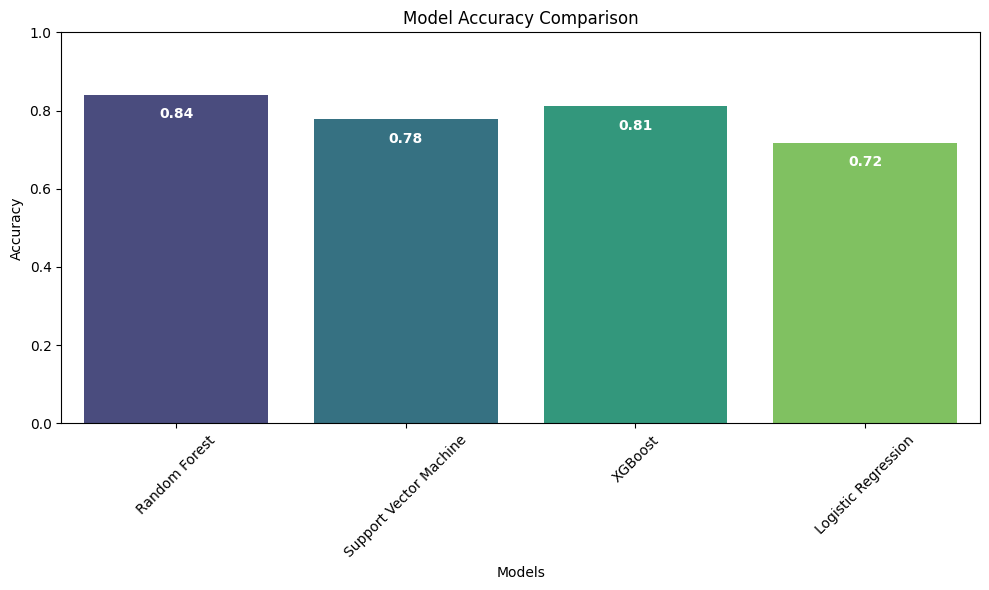

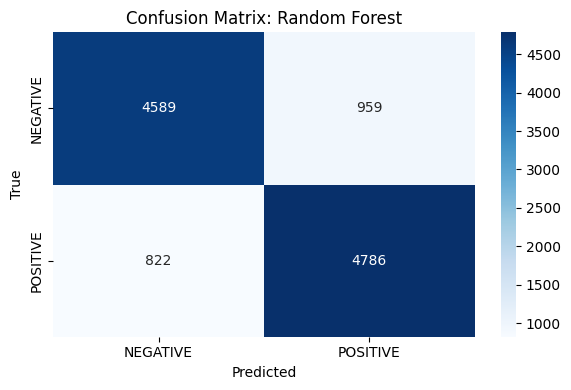

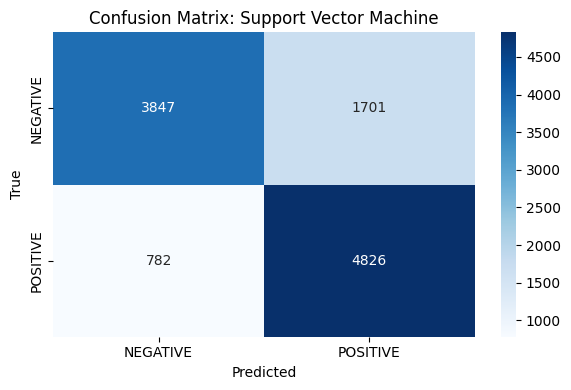

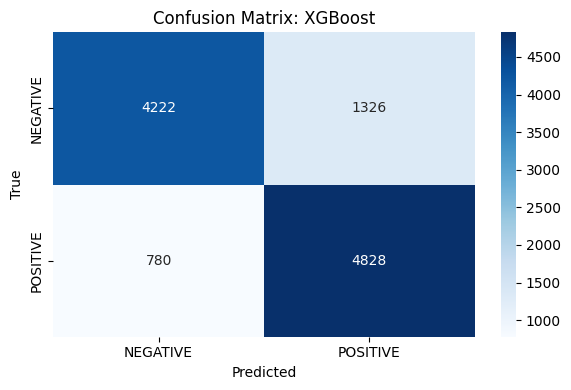

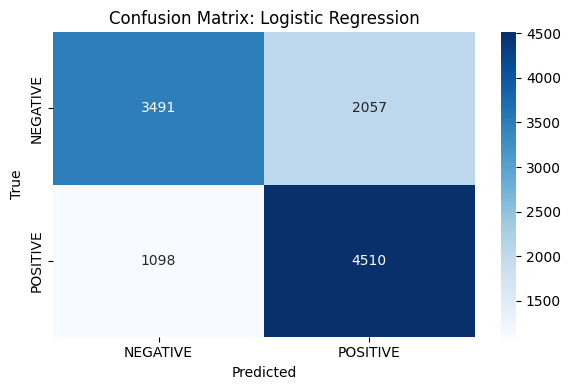

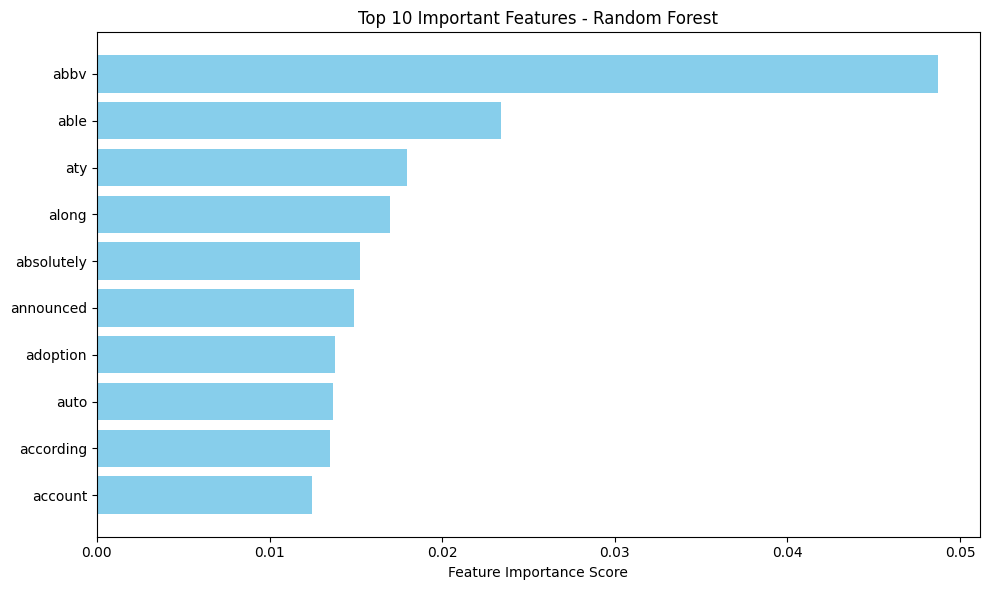

In [131]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Initialize dictionaries to store results
model_accuracies = {}
conf_matrices = {}

# Training, Evaluating, and Storing Results for Visualization
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

    # Store confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# 📊 **Model Accuracy Comparison**
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
for i, acc in enumerate(model_accuracies.values()):
    plt.text(i, acc - 0.05, f'{acc:.2f}', ha='center', va='center', color='white', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 **Confusion Matrix Visualization for Each Model**
for name, matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# 🔥 **Feature Importance Visualization for Random Forest**
# Only applicable if Random Forest was trained
if 'Random Forest' in classifiers:
    rf_classifier = classifiers['Random Forest']
    if hasattr(rf_classifier, 'feature_importances_'):
        feature_importances = rf_classifier.feature_importances_
        indices = np.argsort(feature_importances)[-10:]  # Top 10 features
        features = np.array(vectorizer.get_feature_names_out())[indices]

        plt.figure(figsize=(10, 6))
        plt.barh(features, feature_importances[indices], color='skyblue')
        plt.title('Top 10 Important Features - Random Forest')
        plt.xlabel('Feature Importance Score')
        plt.tight_layout()
        plt.show()
